In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [3]:
#Import donor target zip codes
with open('donor_target_zips.pickle','rb') as read_file:
    new_donor_target = pickle.load(read_file)
new_donor_target.head()

FileNotFoundError: [Errno 2] No such file or directory: 'donor_target_zips.pickle'

In [3]:
#Check number of zip codes in donor target
new_donor_target.shape[0]

NameError: name 'new_donor_target' is not defined

In [9]:
#Import technology company zip codes
with open('tech_company_zips.pickle','rb') as read_file:
    new_tech_target = pickle.load(read_file)
new_tech_target.head()

,Company
zipcode,
10001,6
10003,8
10010,16
10011,5
10012,10


In [10]:
#Check number of zip codes in tech target
new_tech_target.shape[0]

8

In [12]:
target_zip = pd.DataFrame.merge(new_donor_target,new_tech_target,on="zipcode")

In [13]:
#Check number of zip codes in target file
target_zip.shape[0]

6

In [14]:
#These top six zip codes are our target data set based on combined donor and tech hub data

target_zip

,PCT_DONORS,Company
zipcode,,
10003,0.471880,8
10010,0.490275,16
10011,0.526733,5
10012,0.411353,10
10013,0.387674,7
10014,0.515960,5


In [4]:
#Read in formatted MTA Data

pd.read_csv('/Users/kelly/metis_v3/konelson-mta-project/mta_data_with_zip_codes.csv').head()

,unit,station,date_stamp,time_stamp,zip,incremental_ppl
0,R051,59 ST,2018-04-02,08:00:00,10022,25
1,R051,59 ST,2018-04-02,12:00:00,10022,134
2,R051,59 ST,2018-04-02,16:00:00,10022,210
3,R051,59 ST,2018-04-02,20:00:00,10022,630
4,R051,59 ST,2018-04-02,00:00:00,10022,161


In [5]:
unit_by_zip = pd.read_csv('/Users/kelly/metis_v3/konelson-mta-project/mta_data_with_zip_codes.csv')

In [6]:
#Check zip code mappings by unit for each subway station

unit_by_zip.groupby(by = ['zip', 'unit', 'station'])[['incremental_ppl']].sum().head()

incremental_ppl
zip   unit station                        
7029  R544 HARRISON                 197618
7302  R543 EXCHANGE PLACE           385659
      R551 GROVE STREET             483636
7305  R552 JOURNAL SQUARE           631626
10001 R031 34 ST-PENN STA           780098

In [7]:
#Filter for target donor & tech hub population

zipmask = (unit_by_zip.zip == 10003) | (unit_by_zip.zip == 10010) |(unit_by_zip.zip == 10011) | (unit_by_zip.zip == 10012) | (unit_by_zip.zip == 10013) | (unit_by_zip.zip == 10014)

In [8]:
unit_by_zip[zipmask].zip.value_counts()

10011    21159
10013    12547
10003     7510
10014     6673
10010     5052
10012     3838
Name: zip, dtype: int64

In [9]:
#Sort filtered data in order of highest entries for the month of April 2018

unit_by_zip[zipmask].groupby(by = ['zip', 'unit', 'station'])[['incremental_ppl']].sum().sort_values(by = 'incremental_ppl', ascending = False)

,,,incremental_ppl
zip,unit,station,
10003,R170,14 ST-UNION SQ,2278722
10011,R012,34 ST-PENN STA,1482310
10014,R138,W 4 ST-WASH SQ,893649
10010,R083,23 ST,600107
10011,R111,23 ST,573221
10010,R131,23 ST,555348
10011,R175,8 AV,529497
10013,R463,CANAL ST,490828
10011,R013,34 ST-PENN STA,490308


In [10]:
#Check why Fulton Center and WTC were not included

fultonmask = unit_by_zip.station == 'FULTON ST'

In [11]:
unit_by_zip[fultonmask]['zip'].value_counts()

10038    9759
11217     696
Name: zip, dtype: int64

In [12]:
#Donor percent for 10038 is 33.7%, two tech companies

In [13]:
wtcmask = unit_by_zip.station == 'PATH NEW WTC'

In [14]:
#Donor percent for 10005 is 43.8%, zero tech companies

In [15]:
unit_by_zip[wtcmask]['zip'].value_counts()

10005    5457
Name: zip, dtype: int64

In [16]:
total_by_station = unit_by_zip.groupby(by = ['station'], as_index = False)[['incremental_ppl']].sum()
total_by_station.rename(columns = {'incremental_ppl': 'total_ppl'}, inplace = True)

In [17]:
total_by_date = unit_by_zip.groupby(by = ['station', 'date_stamp'], as_index = False)[['incremental_ppl']].sum()
total_by_date.rename(columns = {'incremental_ppl': 'total_ppl'}, inplace = True)
total_by_date['weekday'] = pd.to_datetime(total_by_date['date_stamp']).dt.dayofweek

In [18]:
time_of_day = unit_by_zip.groupby(by = ['station', 'time_stamp'], as_index = False)[['incremental_ppl']].sum()
time_of_day.rename(columns = {'incremental_ppl': 'total_ppl'}, inplace = True)

In [19]:
def station_by_day(station_name):
    
    station_name_mask = total_by_date.groupby(by = ['station', 'weekday']).sum().reset_index().station == station_name
    
    return total_by_date.groupby(by = ['station', 'weekday']).sum().reset_index()[station_name_mask] 

In [20]:
def station_time (station_name):

    station_time_mask = time_of_day.station == station_name
     
    return time_of_day[station_time_mask]

In [21]:
station_by_day('14 ST-UNION SQ')

,station,weekday,total_ppl
98,14 ST-UNION SQ,0,341006
99,14 ST-UNION SQ,1,369152
100,14 ST-UNION SQ,2,377429
101,14 ST-UNION SQ,3,376485
102,14 ST-UNION SQ,4,376661
103,14 ST-UNION SQ,5,254828
104,14 ST-UNION SQ,6,183161


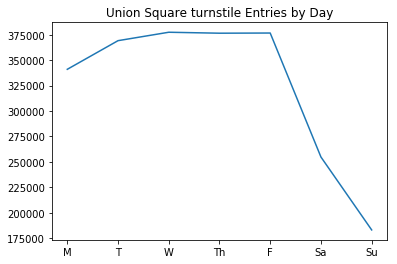

In [23]:
plt.plot(station_by_day('14 ST-UNION SQ').weekday,station_by_day('14 ST-UNION SQ').total_ppl)
plt.title("Union Square turnstile Entries by Day");

labels = ['M','T','W','Th','F','Sa', 'Su']
plt.xticks(np.arange(7), (labels));

In [24]:
station_time ('14 ST-UNION SQ')

,station,time_stamp,total_ppl
112,14 ST-UNION SQ,05:00:00,39242
113,14 ST-UNION SQ,09:00:00,182502
114,14 ST-UNION SQ,13:00:00,354914
115,14 ST-UNION SQ,17:00:00,724099
116,14 ST-UNION SQ,21:00:00,977965


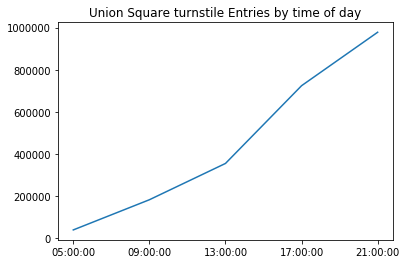

In [25]:
plt.plot(station_time('14 ST-UNION SQ').time_stamp,station_time('14 ST-UNION SQ').total_ppl)
plt.title("Union Square turnstile Entries by time of day");

In [26]:
weekday_mask = (total_by_date.groupby(by = ['station', 'weekday']).sum().reset_index().weekday == 0)|(total_by_date.groupby(by = ['station', 'weekday']).sum().reset_index().weekday == 1 )|(total_by_date.groupby(by = ['station', 'weekday']).sum().reset_index().weekday == 2 )|(total_by_date.groupby(by = ['station', 'weekday']).sum().reset_index().weekday == 3 )|(total_by_date.groupby(by = ['station', 'weekday']).sum().reset_index().weekday == 4 )
weekdays = total_by_date.groupby(by = ['station', 'weekday']).sum().reset_index()[weekday_mask]

In [27]:
def weekdays(station_name):
    
    weekday_mask = (total_by_date.groupby(by = ['station', 'weekday']).sum().reset_index().weekday == 0)|(total_by_date.groupby(by = ['station', 'weekday']).sum().reset_index().weekday == 1 )|(total_by_date.groupby(by = ['station', 'weekday']).sum().reset_index().weekday == 2 )|(total_by_date.groupby(by = ['station', 'weekday']).sum().reset_index().weekday == 3 )|(total_by_date.groupby(by = ['station', 'weekday']).sum().reset_index().weekday == 4 )
    weekdays = total_by_date.groupby(by = ['station', 'weekday']).sum().reset_index()[weekday_mask]

    station_name_mask = weekdays.station == station_name
    
    return weekdays[station_name_mask] 

In [28]:
weekdays('14 ST-UNION SQ')

,station,weekday,total_ppl
98,14 ST-UNION SQ,0,341006
99,14 ST-UNION SQ,1,369152
100,14 ST-UNION SQ,2,377429
101,14 ST-UNION SQ,3,376485
102,14 ST-UNION SQ,4,376661


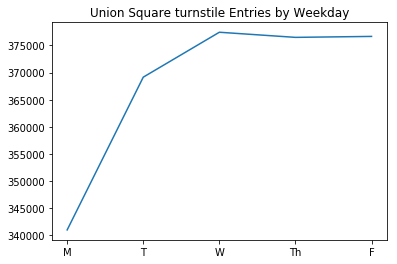

In [29]:
plt.plot(weekdays('14 ST-UNION SQ').weekday,weekdays('14 ST-UNION SQ').total_ppl)
plt.title("Union Square turnstile Entries by Weekday");

labels = ['M','T','W','Th','F']
plt.xticks(np.arange(5), (labels));

In [30]:
weekly_time_of_day = unit_by_zip.groupby(by = ['station', 'date_stamp','time_stamp'], as_index = False)[['incremental_ppl']].sum()
weekly_time_of_day.rename(columns = {'incremental_ppl': 'total_ppl'}, inplace = True)
weekly_time_of_day['weekday'] = pd.to_datetime(total_by_date['date_stamp']).dt.dayofweek

In [31]:
weekly_time_of_day.head()

,station,date_stamp,time_stamp,total_ppl,weekday
0,1 AV,2018-03-31,00:00:00,3601,5.0
1,1 AV,2018-03-31,08:00:00,471,6.0
2,1 AV,2018-03-31,12:00:00,2509,0.0
3,1 AV,2018-03-31,16:00:00,4115,1.0
4,1 AV,2018-03-31,20:00:00,4491,2.0


In [32]:
def weekday_time (station_name):

    weekday_mask = (weekly_time_of_day.groupby(by = ['station', 'weekday']).sum().reset_index().weekday == 0)|(weekly_time_of_day.groupby(by = ['station', 'weekday']).sum().reset_index().weekday == 1 )|(weekly_time_of_day.groupby(by = ['station', 'weekday']).sum().reset_index().weekday == 2 )|(weekly_time_of_day.groupby(by = ['station', 'weekday']).sum().reset_index().weekday == 3 )|(weekly_time_of_day.groupby(by = ['station', 'weekday']).sum().reset_index().weekday == 4 )
    weekdays = weekly_time_of_day.groupby(by = ['station', 'weekday']).sum().reset_index()[weekday_mask]
    
    station_time_mask = weekly_time_of_day.station == station_name
     
    return weekly_time_of_day[station_time_mask]

In [33]:
weekday_time('14 ST-UNION SQ').head()

,station,date_stamp,time_stamp,total_ppl,weekday
2518,14 ST-UNION SQ,2018-03-31,05:00:00,2171,4.0
2519,14 ST-UNION SQ,2018-03-31,09:00:00,1817,5.0
2520,14 ST-UNION SQ,2018-03-31,13:00:00,9351,6.0
2521,14 ST-UNION SQ,2018-03-31,17:00:00,21666,0.0
2522,14 ST-UNION SQ,2018-03-31,21:00:00,22169,1.0


Text(0.5,1,'Daily Union Square turnstile entries (for Weekdays April 2018)')

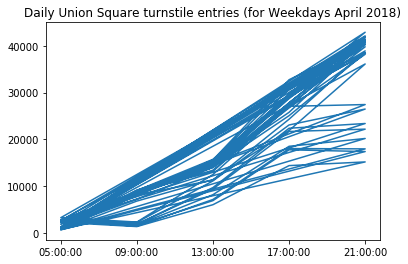

In [34]:
plt.plot(weekday_time('14 ST-UNION SQ').time_stamp, weekday_time('14 ST-UNION SQ').total_ppl);
plt.title ('Daily Union Square turnstile entries (for Weekdays April 2018)')

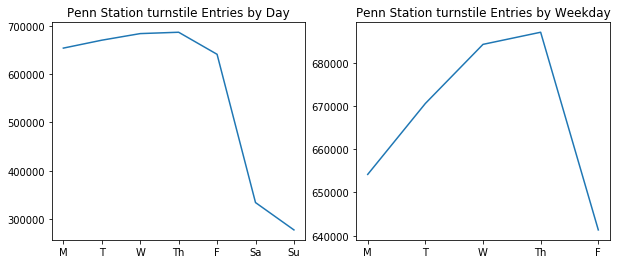

In [35]:
plt.figure(figsize=(10, 4)) 

plt.subplot(1, 2, 1)
plt.plot(station_by_day('34 ST-PENN STA').weekday,station_by_day('34 ST-PENN STA').total_ppl)
plt.title("Penn Station turnstile Entries by Day");

labels = ['M','T','W','Th','F','Sa', 'Su']
plt.xticks(np.arange(7), (labels));

plt.subplot(1, 2, 2)
plt.plot(weekdays('34 ST-PENN STA').weekday,weekdays('34 ST-PENN STA').total_ppl)
plt.title("Penn Station turnstile Entries by Weekday");

labels = ['M','T','W','Th','F']
plt.xticks(np.arange(5), (labels));

In [36]:
station_time('34 ST-PENN STA')

,station,time_stamp,total_ppl
1302,34 ST-PENN STA,00:00:00,314403
1303,34 ST-PENN STA,06:00:00,19194
1304,34 ST-PENN STA,08:00:00,355603
1305,34 ST-PENN STA,10:00:00,482524
1306,34 ST-PENN STA,12:00:00,782713
1307,34 ST-PENN STA,13:25:18,223
1308,34 ST-PENN STA,13:26:28,6
1309,34 ST-PENN STA,13:54:30,655
1310,34 ST-PENN STA,14:00:00,221562
1311,34 ST-PENN STA,16:00:00,487872


In [37]:
station_time('34 ST-PENN STA')[station_time('34 ST-PENN STA')['total_ppl'] > 1000]

,station,time_stamp,total_ppl
1302,34 ST-PENN STA,00:00:00,314403
1303,34 ST-PENN STA,06:00:00,19194
1304,34 ST-PENN STA,08:00:00,355603
1305,34 ST-PENN STA,10:00:00,482524
1306,34 ST-PENN STA,12:00:00,782713
1310,34 ST-PENN STA,14:00:00,221562
1311,34 ST-PENN STA,16:00:00,487872
1312,34 ST-PENN STA,18:00:00,258885
1313,34 ST-PENN STA,20:00:00,811241
1314,34 ST-PENN STA,22:00:00,213856


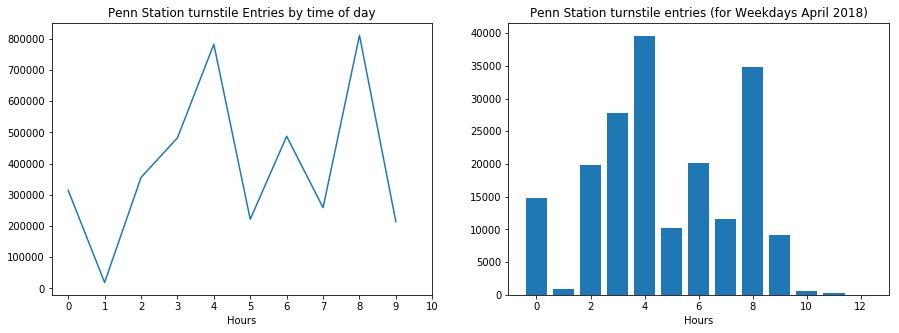

In [38]:
plt.figure(figsize=(15, 5)) #wide and tall

#labels = ['12am, 4am, 8am, 12pm, 4pm, 8pm']

plt.subplot(1, 2, 1)
plt.plot(station_time('34 ST-PENN STA')[station_time('34 ST-PENN STA')['total_ppl'] > 1000].time_stamp,station_time('34 ST-PENN STA')[station_time('34 ST-PENN STA')['total_ppl'] > 1000].total_ppl)
plt.title("Penn Station turnstile Entries by time of day");
plt.xscale('linear')
plt.xticks(np.arange(0,11));
plt.xlabel('Hours');

plt.subplot(1, 2, 2)
plt.bar(weekday_time('34 ST-PENN STA').time_stamp, weekday_time('34 ST-PENN STA').total_ppl);
plt.title ('Penn Station turnstile entries (for Weekdays April 2018)')
plt.xscale('linear');
plt.xlabel('Hours');

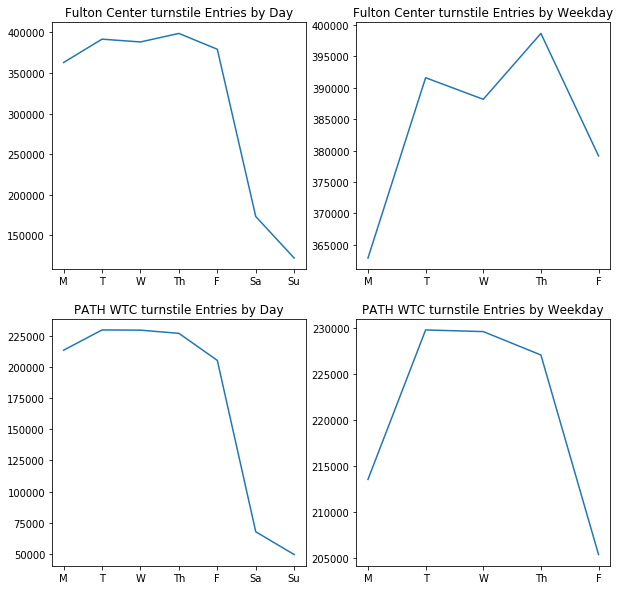

In [39]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(station_by_day('FULTON ST').weekday,station_by_day('FULTON ST').total_ppl)
plt.title("Fulton Center turnstile Entries by Day");

labels = ['M','T','W','Th','F','Sa', 'Su']
plt.xticks(np.arange(7), (labels));

plt.subplot(2, 2, 2)
plt.plot(weekdays('FULTON ST').weekday,weekdays('FULTON ST').total_ppl)
plt.title("Fulton Center turnstile Entries by Weekday");

labels = ['M','T','W','Th','F']
plt.xticks(np.arange(5), (labels));

plt.subplot(2, 2, 3)
plt.plot(station_by_day('PATH NEW WTC').weekday,station_by_day('PATH NEW WTC').total_ppl)
plt.title("PATH WTC turnstile Entries by Day");

labels = ['M','T','W','Th','F','Sa', 'Su']
plt.xticks(np.arange(7), (labels));

plt.subplot(2, 2, 4)
plt.plot(weekdays('PATH NEW WTC').weekday,weekdays('PATH NEW WTC').total_ppl)
plt.title("PATH WTC turnstile Entries by Weekday");

labels = ['M','T','W','Th','F']
plt.xticks(np.arange(5), (labels));


In [40]:
station_time('FULTON ST')

,station,time_stamp,total_ppl
4320,FULTON ST,00:00:00,20518
4321,FULTON ST,05:00:00,10738
4322,FULTON ST,07:00:00,6602
4323,FULTON ST,08:00:00,11377
4324,FULTON ST,09:00:00,167230
4325,FULTON ST,11:00:00,87425
4326,FULTON ST,12:00:00,23507
4327,FULTON ST,13:00:00,231458
4328,FULTON ST,15:00:00,114055
4329,FULTON ST,16:00:00,39759


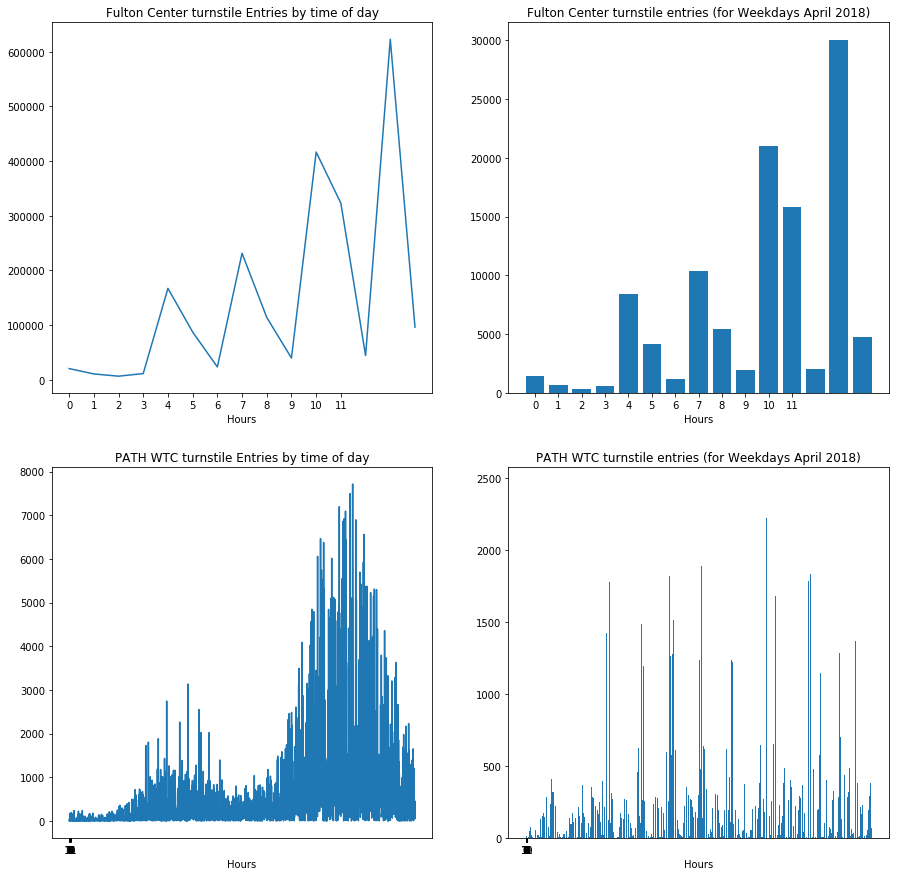

In [63]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.plot(station_time('FULTON ST').time_stamp,station_time('FULTON ST').total_ppl)
plt.title("Fulton Center turnstile Entries by time of day");
plt.xscale('linear')
plt.xticks(np.arange(0,12));
plt.xlabel('Hours');

plt.subplot(2, 2, 2)
plt.bar(weekday_time('FULTON ST').time_stamp, weekday_time('FULTON ST').total_ppl);
plt.title ('Fulton Center turnstile entries (for Weekdays April 2018)')
plt.xscale('linear');
plt.xticks(np.arange(0,12));
plt.xlabel('Hours');

plt.subplot(2, 2, 3)
plt.plot(station_time('PATH NEW WTC').time_stamp,station_time('PATH NEW WTC').total_ppl)
plt.title("PATH WTC turnstile Entries by time of day");
plt.xscale('linear')
plt.xticks(np.arange(0,12));
plt.xlabel('Hours');

plt.subplot(2, 2, 4)
plt.bar(weekday_time('PATH NEW WTC').time_stamp, weekday_time('PATH NEW WTC').total_ppl);
plt.title ('PATH WTC turnstile entries (for Weekdays April 2018)')
plt.xscale('linear');
plt.xticks(np.arange(0,12));
plt.xlabel('Hours');

In [43]:
#Check all target locations in top 20 busiest stations overall 
#Would exclude other top stations due to tourists not in town for gala:  Herald Sq, Times Sq
#Or commuters who live out of town in NJ and CT and excluded from target population: Grand Central, Port Authority

total_by_station.sort_values(by = ['total_ppl'], ascending = (False)).head(20)

,station,total_ppl
58,34 ST-PENN STA,3948737
223,GRD CNTRL-42 ST,3375891
57,34 ST-HERALD SQ,2699590
45,23 ST,2653383
335,TIMES SQ-42 ST,2364082
14,14 ST-UNION SQ,2278722
216,FULTON ST,2215654
64,42 ST-PORT AUTH,2185570
105,86 ST,2056315
82,59 ST COLUMBUS,1804594


In [82]:
weekly_time_of_day.weekday.value_counts()

1.0    1440
3.0    1440
2.0    1440
0.0    1440
4.0    1439
5.0    1419
6.0    1414
Name: weekday, dtype: int64

In [103]:
weekday = (weekly_time_of_day.weekday == 0) | (weekly_time_of_day.weekday == 1)| (weekly_time_of_day.weekday == 2)| (weekly_time_of_day.weekday == 3)| (weekly_time_of_day.weekday == 4)

In [106]:
weekdays = weekly_time_of_day[weekday]

In [107]:
targeted_stations = (weekdays.station == '34 ST-PENN STA')|(weekdays.station == '14 ST-UNION SQ')|(weekdays.station == '14 ST-UNION SQ')|(weekdays.station == 'FULTON ST')|(weekdays.station == 'PATH NEW WTC')
weekdays[targeted_stations].head()


,station,date_stamp,time_stamp,total_ppl,weekday
2518,14 ST-UNION SQ,2018-03-31,05:00:00,2171,4.0
2521,14 ST-UNION SQ,2018-03-31,17:00:00,21666,0.0
2522,14 ST-UNION SQ,2018-03-31,21:00:00,22169,1.0
2523,14 ST-UNION SQ,2018-04-01,05:00:00,2216,2.0
2524,14 ST-UNION SQ,2018-04-01,09:00:00,1309,3.0


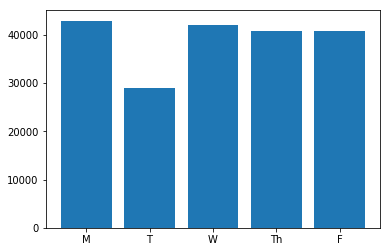

In [115]:
#Combined station total for Union Square, Penn Station and Transportation Hub

plt.bar(weekdays[targeted_stations].weekday, weekdays[targeted_stations].total_ppl)

labels = ['M','T','W','Th','F']
plt.xticks(np.arange(5), (labels));